In [1]:
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## https://gist.github.com/fchollet
meanloss = []
valloss = []

accuA = []
valaccuA = []

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
for i in range(5):
    # define cnn model
    def define_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # plot diagnostic learning curves
    def summarize_diagnostics(history):
        f = pyplot.figure(figsize=(10,10))
        # plot loss
        ax = f.add_subplot(211)
        ax.title.set_text('Cross Entropy Loss')
        ax.plot(history.history['loss'], color='blue', label='train')
        ax.plot(history.history['val_loss'], color='orange', label='test')
        ax.legend()
        # plot accuracy
        ax2 = f.add_subplot(212)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(history.history['accuracy'], color='blue', label='train')
        ax2.plot(history.history['val_accuracy'], color='orange', label='test')
        ax2.legend()
        # save plot to file
#         filename = sys.argv[0].split('/')[-1]
        pyplot.savefig('loos128_128_plot.png')
        pyplot.close()

    # run the test harness for evaluating a model
    def run_test_harness():
        # define model
        model = define_model()
        # create data generator
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        # prepare iterators
        train_it = datagen.flow_from_directory('split/train/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        test_it = datagen.flow_from_directory('split/test/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        # fit model
        history = model.fit(train_it, steps_per_epoch=len(train_it),
            validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        print(i)
        print('> %.3f' % (acc * 100.0))
        print(f'loss mean = {history.history["loss"]}')
        print("*************************************")        
        print(f'loss valmean = {history.history["val_loss"]}')
        
        valloss.append(history.history["val_loss"])
        meanloss.append(history.history["loss"])
        
        accuA.append(history.history["accuracy"])
        valaccuA.append(history.history["val_accuracy"])
        # learning curves
        summarize_diagnostics(history)

    # entry point, run the test harness
    run_test_harness()
    print("-------------------------------\n")

Found 280 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
0
> 81.667
loss mean = [1.418550968170166, 0.6685819029808044, 0.685606062412262, 0.5955334305763245, 0.578768789768219, 0.5486340522766113, 0.4959547817707062, 0.4571560323238373, 0.444573312997818, 0.4366713762283325, 0.38058632612228394, 0.3760758936405182, 0.3418103754520416, 0.34104466438293457, 0.2974432408809662, 0.3189868628978729, 0.2859552800655365, 0.2542787492275238, 0.2650758624076843, 0.2786608040332794]
*************************************
loss valmean = [0.7511540651321411, 0.6382830739021301, 0.5825250148773193, 0.6007992029190063, 0.5937936902046204, 0.5575411319732666, 0.4991746246814728, 0.5006282925605774, 0.48971107602119446, 0.4845949113368988, 0.48474591970443726, 0.4627169966697693, 0.4971475899219513, 0.4512934386730194, 0.45179837942123413, 0.5354615449905396, 0.6379933953285217, 0.48424237966537476, 0.6752529144287109, 0.4798053205013275]
-------------------------------

Found 

In [3]:
import numpy as np
mloss = [float(sum(l))/len(l) for l in zip(*meanloss)]
print(meanloss)

mvloss = [float(sum(l))/len(l) for l in zip(*valloss)]
print(valloss)

[[1.418550968170166, 0.6685819029808044, 0.685606062412262, 0.5955334305763245, 0.578768789768219, 0.5486340522766113, 0.4959547817707062, 0.4571560323238373, 0.444573312997818, 0.4366713762283325, 0.38058632612228394, 0.3760758936405182, 0.3418103754520416, 0.34104466438293457, 0.2974432408809662, 0.3189868628978729, 0.2859552800655365, 0.2542787492275238, 0.2650758624076843, 0.2786608040332794], [3.390956401824951, 0.6754124164581299, 0.6543660163879395, 0.6146156787872314, 0.6609120965003967, 0.6418161392211914, 0.5651974678039551, 0.5549330711364746, 0.5201771259307861, 0.5013642311096191, 0.4727509021759033, 0.462929904460907, 0.4401001036167145, 0.40409407019615173, 0.4604518413543701, 0.45643383264541626, 0.4190747141838074, 0.3890802562236786, 0.3214813768863678, 0.3420447111129761], [1.0955710411071777, 0.6766200661659241, 0.6468165516853333, 0.5745096206665039, 0.5048290491104126, 0.45380687713623047, 0.4714384377002716, 0.4627404808998108, 0.4801534414291382, 0.4686754047870

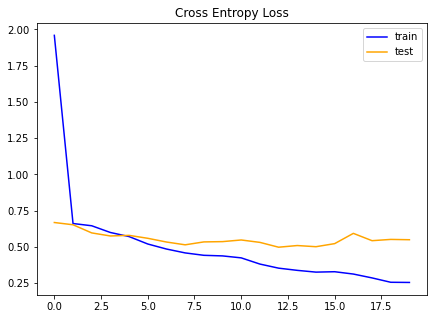

In [4]:
pyplot.figure(figsize=(7,5))
pyplot.title('Cross Entropy Loss')
pyplot.plot(mloss, color='blue', label='train')
pyplot.plot(mvloss, color='orange', label='test')
pyplot.legend()